In [182]:
import pandas as pd
import shelve
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')

In [183]:
for f in set([f[:-4] for f in os.listdir() if f.startswith('resultados_')]):
    with shelve.open(f) as db:
        try:
            print(f, db['nome_fundo'])
        except:
            pass
        
file = 'resultados_12055107000116.pkl'
print("***********************")
with shelve.open(file) as db:
    for k in list(db.keys()):
        print('loaded',k)
        globals()[k] = db[k]
        
print(nome_fundo)
file = "Index_PortfolioCompositionFile_IBOV_20100101_20181231.csv"
ibov = pd.read_csv(file, sep=';', encoding='latin=1', parse_dates=['RptDt'])

ibov['stock_value'] = ibov['ThrlQty'] * ibov['LastPric']
ibov['stock_weight'] = ibov['stock_value'].div(ibov.groupby('RptDt')['stock_value'].transform('sum'))

resultados_02895694000106.pkl FRANKLIN VALOR E LIQUIDEZ FVL FUNDO DE INVESTIMENTO EM AÇÕES
resultados_08279304000141.pkl ICATU VANGUARDA DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES
resultados_11188572000162.pkl ATMOS MASTER FUNDO DE INVESTIMENTO DE AÇÕES
resultados_2_12055107000116.pkl ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I
resultados_18138908000121.pkl ITAÚ IBOVESPA ATIVO MASTER FUNDO DE INVESTIMENTO EM AÇÕES
resultados_12055107000116.pkl ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I
resultados_08912569000135.pkl GAP AÇÕES FUNDO DE INVESTIMENTO DE AÇÕES
resultados_01699688000102.pkl SANTANDER FI IBOVESPA ATIVO INSTITUCIONAL AÇÕES
resultados_05589433000148.pkl BRAM FUNDO DE INVESTIMENTO EM AÇÕES IBOVESPA ATIVO
resultados_11980010000157.pkl EQUITAS MASTER SELECTION FUNDO DE INVESTIMENTO DE AÇÕES
resultados_08046355000123.pkl FUNDO DE INVESTIMENTO EM AÇÕES CAIXA IBOVESPA ATIVO
resultados_13155995000101.pkl DAYCOVAL IBOVESPA ATIVO FUNDO DE INVE

In [184]:
classes = pd.read_excel("classificao_acoes.xlsx", encoding='latin1')
classes.columns = ['SETOR', 'SUBSETOR',
                   'SEGMENTO', 'EMPRESA', 'CODIGO', 'SEGMENTO.1']
classes.sort_values('SETOR', inplace=True)
classes_acoes = dict(classes[['CODIGO', 'SETOR']].apply(lambda s: s.str.strip()).values)

lastPric = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='LastPric')
thrlQty = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='ThrlQty') 
ecncVal = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='stock_value') 
stockPrtcptnPct = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='stock_weight')

pesos_ibov = ecncVal.div(ecncVal.sum(1),axis=0).loc[:'2017']
retornos_ibov = lastPric.pct_change().mask(lastPric.isna()).loc[:'2017']

pesos_estimados = estimativas.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()

retornos_fundos_ponderados = estimativas.mul(signals)
retornos_ibov_ponderados = retornos_ibov.mul(pesos_ibov).reindex(index=retornos_fundos_ponderados.index)


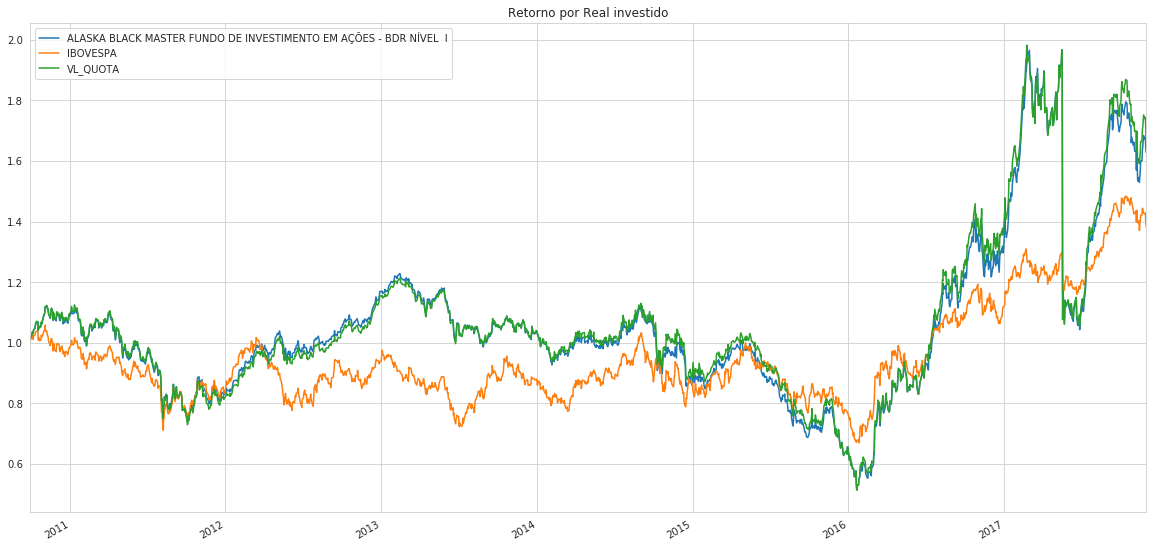

In [185]:
ax = retornos_fundos_ponderados.sum(1).add(1).cumprod().plot(label=nome_fundo, figsize=(20,10))
retornos_ibov_ponderados.sum(1).add(1).cumprod().plot(label='IBOVESPA', ax=ax)
measurements.add(1).cumprod().plot(ax=ax)
ax.legend()
plt.title('Retorno por Real investido');

### Participação setorial no retorno do IBOV

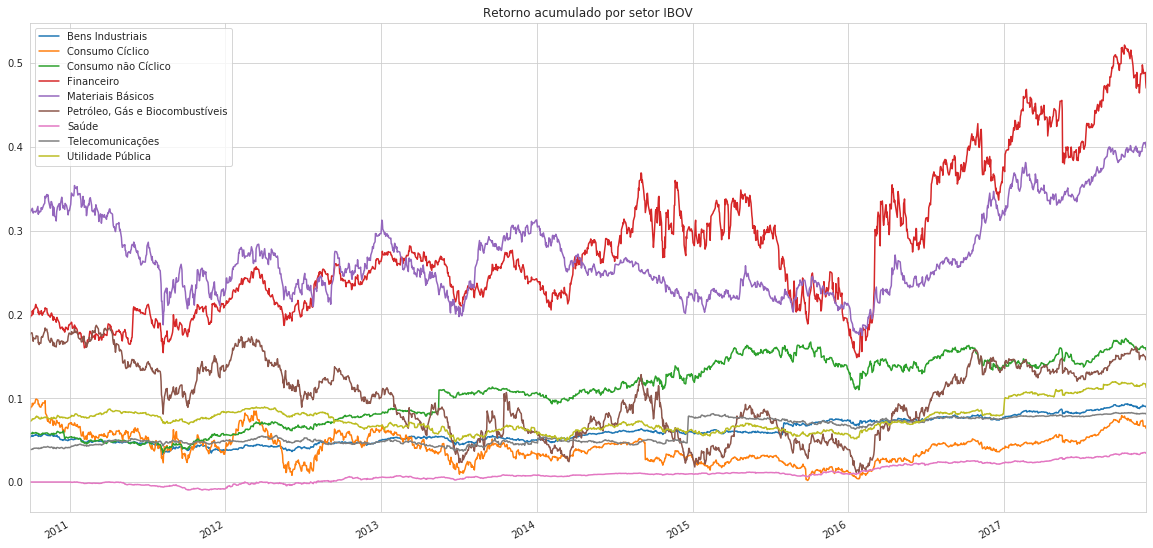

In [186]:
start = ecncVal.div(ecncVal.sum(1),axis=0).groupby(lambda c: classes_acoes.get(c[:4]), axis=1).sum().iloc[0]
ix = retornos_ibov_ponderados.groupby(lambda c: classes_acoes.get(c[:4]), axis=1).sum()
ix.iloc[0] = start
#ax = ix.add(1).cumprod().sub(1).sum(1).plot( color='black', label='IBOV', alpha=.8, secondary_y=False, lw=1)
ax = ix.add(1).cumprod().sub(1).plot(figsize=(20,10))
ax.legend()
plt.title('Retorno acumulado por setor IBOV');

### Participação Setorial no retorno do fundo

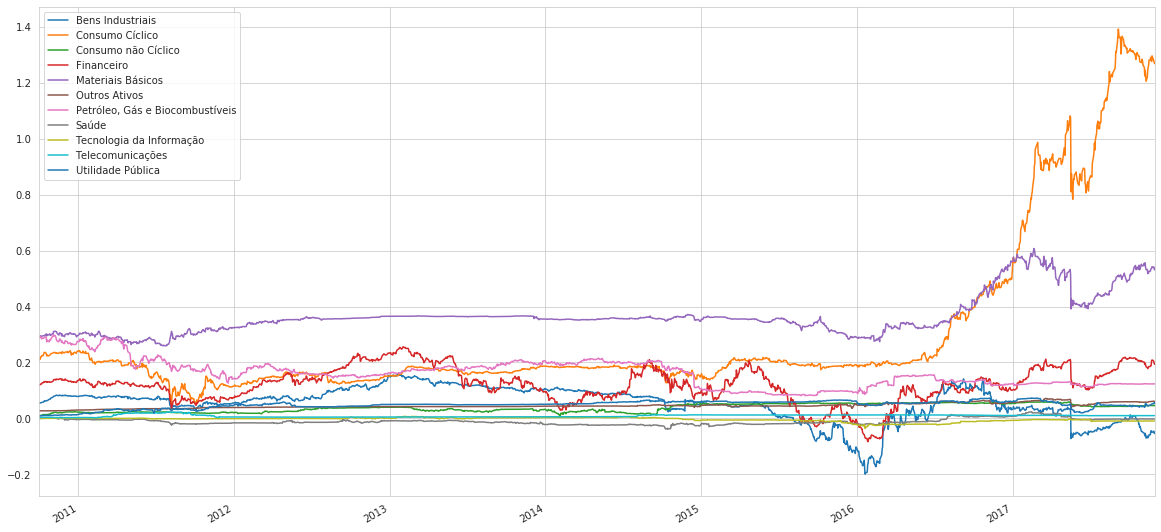

In [187]:
rfp_setor = retornos_fundos_ponderados.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()
rfp_setor.iloc[0] = estimativas.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum().iloc[0]
rfp_setor.add(1).cumprod().sub(1).plot(figsize=(20,10))

### Alocação x Retorno  em açoes

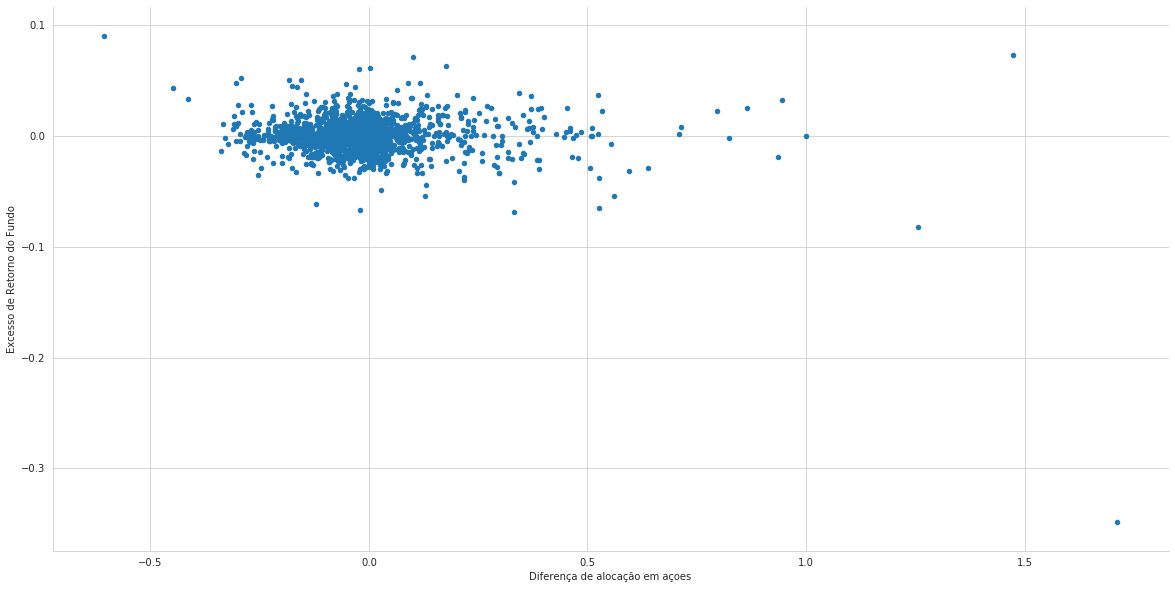

In [189]:
excesso_retorno_fundo = retornos_fundos_ponderados.sum(1) - retornos_ibov_ponderados.sum(1)
diferenca_alocacao = estimativas.reindex(columns=retornos_acoes_empresa).sum(1) - 1

pd.concat([excesso_retorno_fundo, diferenca_alocacao], 
          keys=['Excesso de Retorno do Fundo','Diferença de alocação em açoes'],
          axis=1).plot.scatter(1,0, figsize=(20,10))

sns.despine()

### Alocação x Retorno por setor

In [155]:
rf_setoriais = retornos_fundos_ponderados.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()
ri_setoriais = retornos_ibov_ponderados.groupby(lambda c: classes_acoes.get(c[:4],'Outros Ativos'), axis=1).sum()

alocacao_fundo_setorial = estimativas.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()
alocacao_ibov_setorial = pesos_ibov.groupby(lambda c: classes_acoes.get(c[:4],'Outros Ativos'), axis=1).sum()

excesso_retorno_setorial = rf_setoriais - ri_setoriais
excesso_alocacao_setorial = (alocacao_fundo_setorial - alocacao_ibov_setorial).dropna(how='all')

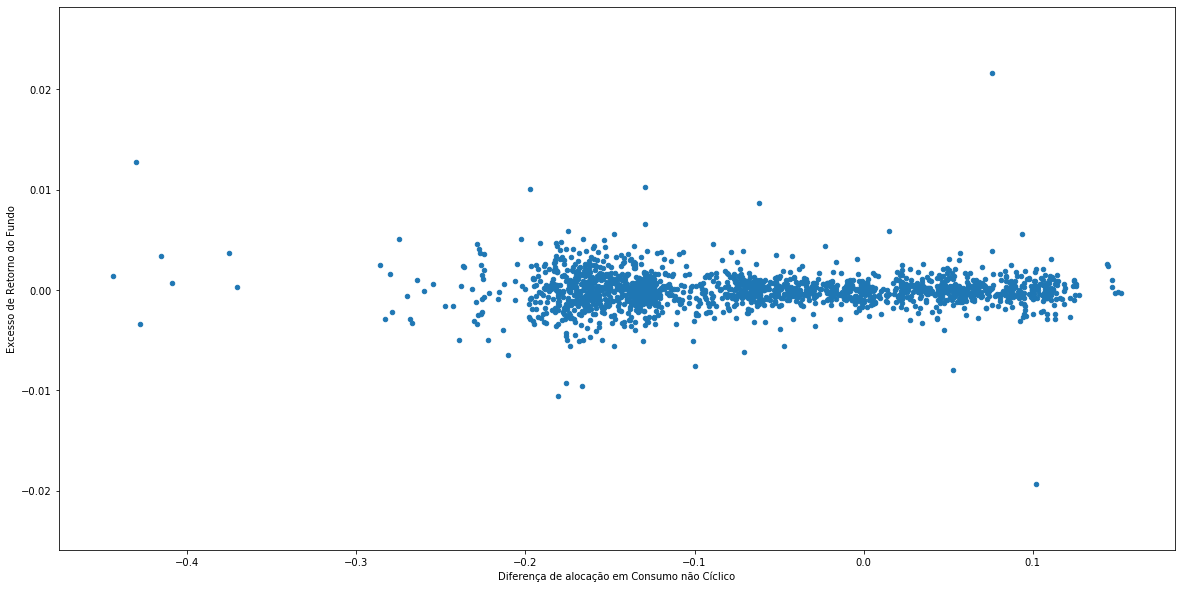

In [157]:
i = 2
pd.concat([excesso_retorno_setorial.iloc[:,i], excesso_alocacao_setorial.iloc[:,i]], 
          keys=['Excesso de Retorno do Fundo','Diferença de alocação em {}'.format(excesso_retorno_setorial.columns[i])],
          axis=1).plot.scatter(1,0, figsize=(20,10))

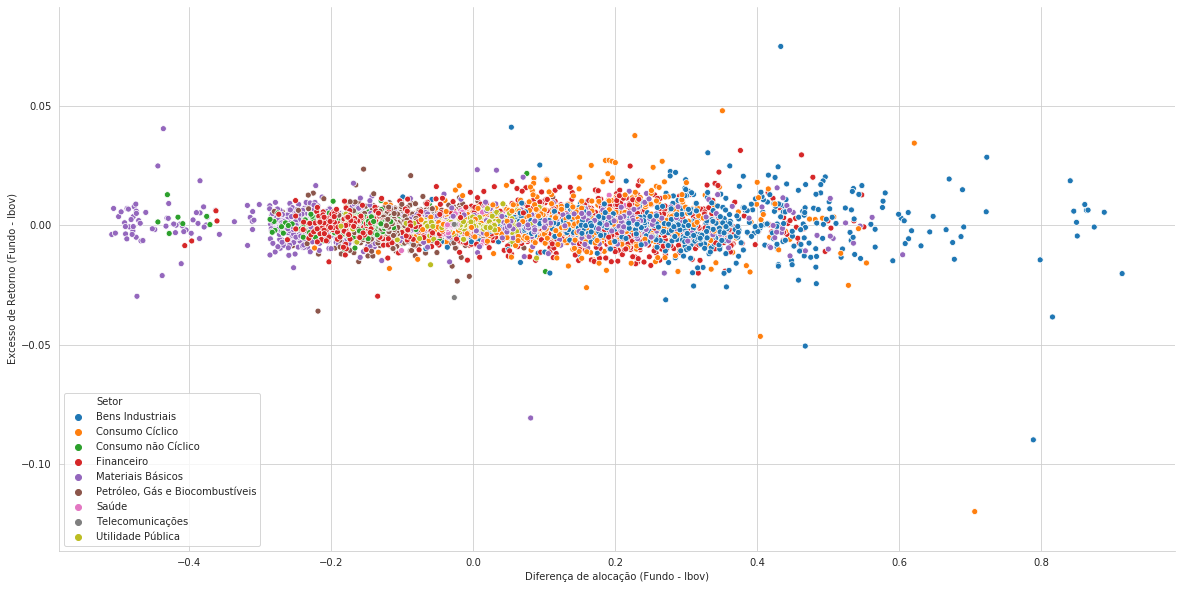

In [193]:
fig, ax = plt.subplots(1, figsize=(20,10))
keys = ['Excesso de Retorno (Fundo - Ibov)','Diferença de alocação (Fundo - Ibov)']
ix = pd.concat([excesso_retorno_setorial, excesso_alocacao_setorial], 
          keys=keys,
          axis=1).stack(level=-1)
ix.index.names = ['Data','Setor']
sns.scatterplot(data=ix.reset_index(), x=keys[1], y=keys[0], hue='Setor', ax=ax)
sns.despine()